# Lesson 3. Coordinate Reference Systems (CRS) & Map Projections

- Explore with CA County data & a USA states dataset
- GOTCHA Try plotting these two together to plot CRS together
- Discussion CRS exist, concept, transform, do they match? (could flip back to slide deck or add more visuals in notebooks)
- PRACTICE
    - CA places data? Transform CRS and plot with county?


In [1]:
import pandas as pd
import geopandas as gpd

import matplotlib # base python plotting library
import matplotlib.pyplot as plt # submodule of matplotlib

# To display plots, maps, charts etc in the notebook
%matplotlib inline  

## 3.1 California County shapefile

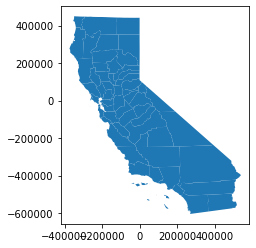

In [2]:
counties = gpd.read_file('notebook_data/california_counties/CaliforniaCounties.shp')
counties.plot()

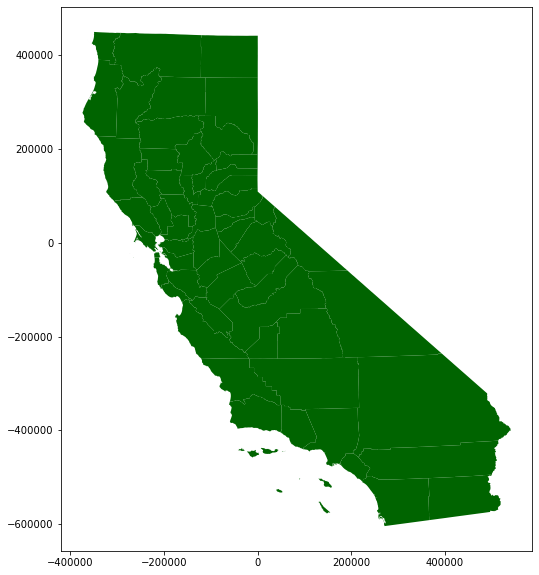

In [3]:
counties.plot(color='darkgreen', figsize=(10,10))

## 3.2 USA State shapefile (or Bike?)

In [4]:
states = gpd.read_file('notebook_data/us_states/us_states.shp')

In [5]:
states.head()

,STATE,GEOID,ABBREV,geometry
0,Alabama,01,AL,"MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ..."
1,Alaska,02,AK,"MULTIPOLYGON (((-134.73726 58.26135, -134.7344..."
2,Arizona,04,AZ,"POLYGON ((-114.81629 32.50804, -114.81432 32.5..."
3,Arkansas,05,AR,"POLYGON ((-94.61783 36.49941, -94.61765 36.499..."
4,California,06,CA,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987..."


In [6]:
states.shape

(56, 4)

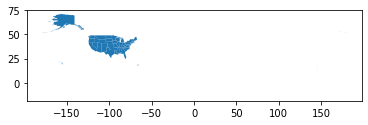

In [7]:
states.plot()

In [8]:
list(states['STATE'])

['Alabama',
 'Alaska',
 'Arizona',
 'Arkansas',
 'California',
 'Colorado',
 'Connecticut',
 'Delaware',
 'District of Columbia',
 'Georgia',
 'Hawaii',
 'Idaho',
 'Illinois',
 'Indiana',
 'Iowa',
 'Kansas',
 'Maryland',
 'Minnesota',
 'Mississippi',
 'Montana',
 'Nevada',
 'New Jersey',
 'New Mexico',
 'North Dakota',
 'Oklahoma',
 'Pennsylvania',
 'South Carolina',
 'South Dakota',
 'Utah',
 'Vermont',
 'West Virginia',
 'Wyoming',
 'American Samoa',
 'Puerto Rico',
 'Florida',
 'Kentucky',
 'Louisiana',
 'Maine',
 'Massachusetts',
 'Michigan',
 'Missouri',
 'Nebraska',
 'New Hampshire',
 'New York',
 'North Carolina',
 'Ohio',
 'Oregon',
 'Rhode Island',
 'Tennessee',
 'Texas',
 'Virginia',
 'Washington',
 'Wisconsin',
 'Guam',
 'Commonwealth of the Northern Mariana Islands',
 'United States Virgin Islands']

In [9]:
# limit data to continental US
non_continental_us = [ 'American Samoa','Puerto Rico','Guam',
                      'Commonwealth of the Northern Mariana Islands',
                      'United States Virgin Islands', 'Alaska','Hawaii']
states_limited = states.loc[~states['STATE'].isin(non_continental_us)]

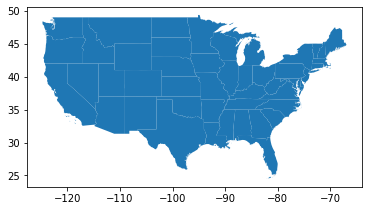

In [10]:
states_limited.plot()

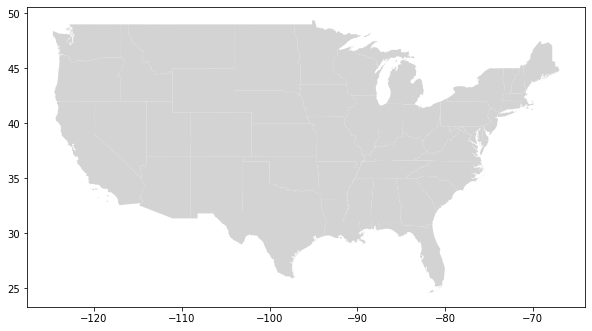

In [11]:
states_limited.plot(color='lightgrey', figsize=(10,10))

## 3.3 Plot the two together

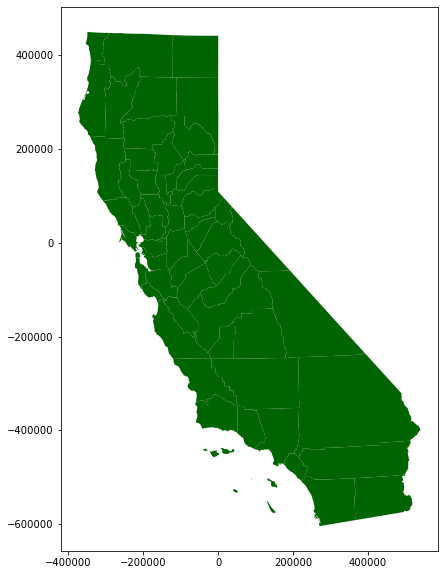

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
counties.plot(color='darkgreen',ax=ax)
states_limited.plot(color='lightgrey', ax=ax)

Gotcha

## 3.4 Coordinate Reference Systems (CRS)



<img src="http://www.pngall.com/wp-content/uploads/2016/03/Light-Bulb-Free-PNG-Image.png" width="20" align=left >  **Question** Do you have experience with Coordinate Reference Systems?



<br><br>As a refresher, a CRS describes how the coordinates in a geospatial dataset relate to locations on the surface of the earth. 

A `geographic CRS` consists of: 
- a 3D model of the shape of the earth (a `datum`), approximated as a sphere or spheroid (aka ellipsoid)
- the `units` of the coordinate system (e.g, decimal degrees, meters, feet) and 
- the `origin `(0,0 location), specified as the `equator` and the `prime meridian`

A `projected CRS` consists of
- a geographic CRS
- a **map projection** and related parameters used to transform the geographic coordinates to `2D` space.
  - a map projection is a mathematical model used to transform coordinate data

### A Geographic vs Projected CRS
<img src ="https://www.e-education.psu.edu/natureofgeoinfo/sites/www.e-education.psu.edu.natureofgeoinfo/files/image/projection.gif" height="100" width="500">

#### There are many, many CRSs

Theoretically the number of CRSs is unlimited!

Why? Primariy, because there are many different definitions of the shape of the earth. Our understanding of its shape and our ability to measure it has changed greatly over time.

#### Why are CRSs Important?

- You need to know the data about your data (or `metadata`) to use it appropriately.


- All projected CRSs introduce distortion in shape, area, and/or distance. So understanding what CRS best maintains the characteristics you need for your area of interest and your analysis is important.


- Some analysis methods expect geospatial data to be in a projected CRS
  - For example, `geopandas` expects a geodataframe to be in a projected CRS for area or distance based analyses.


- Some Python libraries, but not all, implement dynamic reprojection from the input CRS to the required CRS and assume a specific CRS (WGS84) when a CRS is not explicitly defined.


- Most Python spatial libraries, including Geopandas, require geospatial data to be in the same CRS if they are being analysed together.

#### What you need to know when working with CRSs

- What CRSs used in your study area and their main characteristics
- How to identify, or `get`, the CRS of a geodataframe
- How to `set` the CRS of geodataframe (i.e. define the projection)
- Hot to `transform` the CRS of a geodataframe (i.e. reproject the data)

### Codes for CRSs commonly used with CA data

CRSs are typically referenced by an [EPSG code](http://wiki.gis.com/wiki/index.php/European_Petroleum_Survey_Group).  

It's important to know the commonly used CRSs and their EPSG codes for your geographic area of interest.  

For example, below is a list of commonly used CRSs for California geospatial data along with their EPSG codes.

##### Geographic CRSs
-`4326: WGS84` (units decimal degrees) - the most commonly used geographic CRS

-`4269: NAD83` (units decimal degrees) - the geographic CRS customized to best fit the USA. This is used by all Census geographic data.

>  `NAD83 (epsg:4269)` are approximately the same as `WGS84(epsg:4326)` although locations can differ by up to 1 meter in the continental USA and elsewhere up to 3m. That is not a big issue with census tract data as these data are only accurate within +/-7meters.
##### Projected CRSs

-`5070: CONUS NAD83` (units meters) projected CRS for mapping the entire contiguous USA (CONUS)

-`3857: Web Mercator` (units meters) conformal (shape preserving) CRS used as the default in web mapping

-`3310: CA Albers Equal Area, NAD83` (units meters)  projected CRS for CA statewide mapping and spatial analysis

-`26910: UTM Zone 10N, NAD83` (units meters) projected CRS for northern CA mapping & analysis

-`26911: UTM Zone 11N, NAD83` (units meters) projected CRS for Southern CA mapping & analysis

-`102641 to 102646: CA State Plane zones 1-6, NAD83` (units feet) projected CRS used for local analysis.

You can find the full CRS details on the website https://www.spatialreference.org

## 3.5 Getting the CRS

### Getting the CRS of a gdf

GeoPandas GeoDataFrames have a `crs` attribute that returns the CRS of the data.

In [13]:
counties.crs

<Projected CRS: EPSG:3310>
Name: NAD83 / California Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: USA - California
- bounds: (-124.45, 32.53, -114.12, 42.01)
Coordinate Operation:
- name: California Albers
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [14]:
states_limited.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

The above CRS definition specifies 
- the name of the CRS (`WGS84`), 
- the axis units (`metre`)
- the shape (`datum`),
- and the origin (`Prime Meridian`, and the equator)
- and the area for which it is best suited (`Northern hemisphere`)

> Notes:
>    - `geocentric` latitude and longitude assume a spherical (round) model of the shape of the earth
>    - `geodetic` latitude and longitude assume a spheriodal (ellipsoidal) model, which is closer to the true shape.
>    - `geodesy` is the study of the shape of the earth.

In [15]:
print(states_limited.crs)

epsg:4326


## 3.6 Setting the CRS

You can set the CRS of a gdf with the `crs` method.  You would set the CRS if is not defined or if you think it is incorrectly defined.

> In desktop GIS terminology setting the CRS is called `defining the projection`

As an example, let's set the CRS of our data to `None`

In [16]:
# first set the CRS to None
states_limited.crs = None

In [17]:
# Check it again
states_limited.crs

...hummm...

If a variable has a null value (None) then displaying it without printing it won't display anything!

In [18]:
# Check it again
print(states_limited.crs)

None


In [19]:
# Set it to 4326
states_limited.crs = "epsg:4326"

In [20]:
# Show it
states_limited.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

> #### Important note
> - You can `set` the CRS to anything you like - that doesn't make it correct!
> - Setting the CRS does not change the coordinate data. It just tells the software how to interpret it.

## 3.7 Transforming or Reprojecting the CRS
You can transform the CRS of a geodataframe with the `to_crs` method.


> In desktop GIS terminology transforming the CRS is called `projecting the data`

When you do this you want to save the output to a new geodataframe.

In [21]:
states_limited_utm10 = states_limited.to_crs( "epsg:26910")

Now take a look at the CRS.

In [22]:
states_limited_utm10.crs

<Projected CRS: EPSG:26910>
Name: NAD83 / UTM zone 10N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - 126°W to 120°W and NAD83 by country
- bounds: (-126.0, 30.54, -119.99, 81.8)
Coordinate Operation:
- name: UTM zone 10N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

You can see the result immediately by plotting the data.

- What two key differences do you see?

(134312.95214533215, 5295973.096958175, 2936443.847710154, 8098103.992522997)

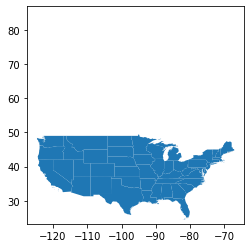

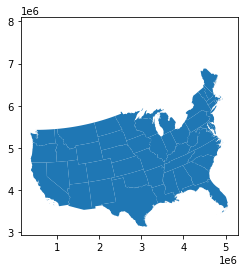

In [23]:
# plot geographic gdf
states_limited.plot();
plt.axis('square');

# plot utm gdf
states_limited_utm10.plot();
plt.axis('square')

## 3.8 Plotting states and counties together

In [24]:
counties_utm10 = counties.to_crs( "epsg:26910")

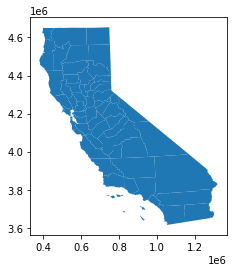

In [25]:
counties_utm10.plot()

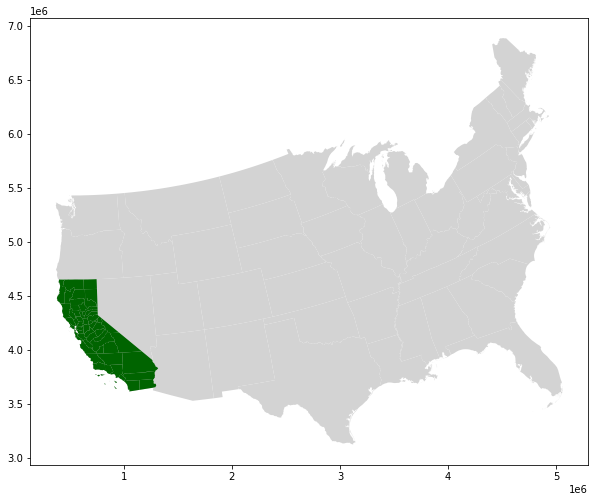

In [28]:
fig, ax = plt.subplots(figsize=(10,10))
states_limited_utm10.plot(color='lightgrey', ax=ax)
counties_utm10.plot(color='darkgreen',ax=ax)

## 3.6 Exercise
1. Bring in the CA places data
2. Check and transorm the CRS if needed
3. Plot the California counties and places together

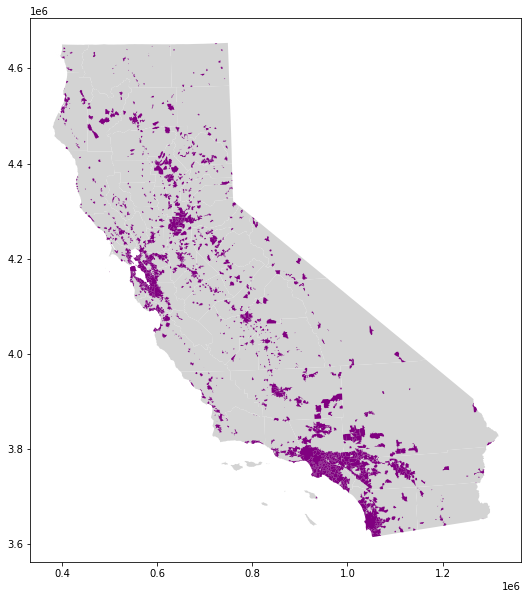

In [31]:
# SOLUTION

# 1. Bring in the CA places data
california_places = gpd.read_file('zip://notebook_data/census/Places/cb_2018_06_place_500k.zip')
california_places.head()

# 2. Check and transorm the CRS if needed
california_places.crs
california_places_utm10 = california_places.to_crs( "epsg:26910")

# 3. Plot the California counties and places together
fig, ax = plt.subplots(figsize=(10,10))
counties_utm10.plot(color='lightgrey', ax=ax)
california_places_utm10 .plot(color='purple',ax=ax)

---
<div style="display:inline-block;vertical-align:middle;">
<a href="https://dlab.berkeley.edu/" target="_blank"><img src ="../assets/images/dlab_logo.png" width="75" align="left">
</a>
</div>

<div style="display:inline-block;vertical-align:middle;">
    <div style="font-size:larger">&nbsp;D-Lab @ University of California - Berkeley</div>
    <div>&nbsp;Team Geo<div>
</div>
        
